In [130]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

# Model of the ant colony
system_name = 'ant_cons'
# Name of the specific run with the current parmeters
run_name = '2p_gamma_pcons2_a'

data_dir = 'data/' + system_name + '_multi/' + run_name + '/'

## Environment

### General parameters

In [131]:
env_params = dict()

# Size of the belly of each ant
env_params['max_k'] = 10
# Number of recipient in the colony
env_params['n_recipients'] = 1
# Probability of a succesfull gathering
env_params['p_succ'] = 0.9

if system_name == 'ant_cons':
    # Probability that the food of a recipient decreases
    env_params['p_consume'] = np.linspace(0,1,8)

In [132]:
# Which parameter fileds are multiple
env_params['multi'] = ['p_consume']

### Initial condition

In [133]:
# Number between 1-max_k for a deterministic initialization of the ant food
# Number greater than max_k for a random initialization
env_params['init_k'] = [1 for _ in range(env_params['n_recipients']+1)]

## Algorithm

### Algorithm type

In [134]:
alg_params = dict()
alg_params['alg_type'] = 'nac'
alg_params['gamma'] = 1 - np.logspace(-3, -0.5 ,8)
alg_params['stop_by_discount'] = 'true'

# TIME
alg_params['n_steps'] = 15000000 # Number of training steps
alg_params['traj_points'] = 0

### General parameters

In [135]:
# CRITIC LEARNING RATE
alg_params['a0'] = 0.005
alg_params['ac'] = alg_params['n_steps'] / 300
alg_params['a_expn'] = 0.8
alg_params['a_burn'] = alg_params['n_steps'] / 2

# ACTOR LEARNING RATE
alg_params['b0'] = 0.000003
alg_params['bc'] = alg_params['n_steps'] / 300
alg_params['b_expn'] = 0.8
alg_params['b_burn'] = alg_params['n_steps']

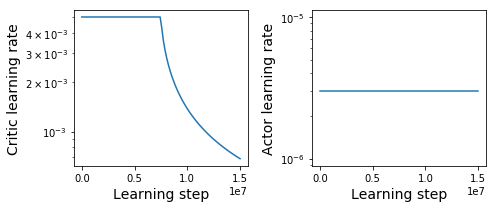

In [136]:
fig, (ax1, ax2) = ut.plot_lr(alg_params)
plt.tight_layout()

### Init condition of the learning

In [137]:
# INITIAL CONDITIONS
# Comment 'init_q_path' for a flat policy
#alg_params['init_q_path'] = '../data/' + system_name + '/sarsa_a/best_quality.txt' 
alg_params['init_values'] = 30
#alg_params['init_values_rand'] = 150

In [138]:
alg_params['multi'] = ['gamma']

## Wtriting the parameters in data_dir

In [139]:
from copy import copy

# Fare in modo che il printi il parametro singolo e non il vettore
count = 0;
aux_env_params = copy(env_params)
aux_alg_params = copy(alg_params)

for par_e in env_params['multi']:
    for val_e in env_params[par_e]:
        aux_env_params[par_e] = val_e
        for par_a in alg_params['multi']:
            for val_a in alg_params[par_a]:
                aux_alg_params[par_a] = val_a
                ut.write_params(aux_env_params, data_dir, "param_env_"+str(count)+".txt")
                ut.write_params(aux_alg_params, data_dir, "param_alg_"+str(count)+".txt")
                count += 1     
        
info = dict()
info['counts'] = count
m = []
for par_e in env_params['multi']:
    m.append(par_e)
    info[par_e] = env_params[par_e]
for par_a in alg_params['multi']:
    m.append(par_a)
    info[par_a] = alg_params[par_a]
info['multi'] = m
    
ut.write_params(info, data_dir, "info.txt")